<a href="https://colab.research.google.com/github/dmitriiDr/Notebooks_ML/blob/main/SMArt_building_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import Libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

#**Step** 2: Load the Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.columns = ['Relative Compactness', 'Surface Area', 'Wall Area',
                'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area',
                'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

#**Step** 3: Data Preprocessing

In [6]:
data.isnull().sum()

,0
Relative Compactness,0
Surface Area,0
Wall Area,0
Roof Area,0
Overall Height,0
Orientation,0
Glazing Area,0
Glazing Area Distribution,0
Heating Load,0
Cooling Load,0


**Features and Targets separation**

In [7]:
X = data.iloc[:, :-2]
y_heating = data.iloc[:, -2]
y_cooling = data.iloc[:, -1]

**Split data into training and test sets (80% train, 20% test)**

In [9]:
X_train, X_test, y_train, y_cooling_test = train_test_split(X, y_cooling, test_size=0.2, random_state=42)
X_train_heating, X_test_heating, y_train, y_heating_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)

**Standardize the features**

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_heating_scaled = scaler.fit_transform(X_train_heating)
X_test_heating_scaled = scaler.transform(X_test_heating)

#**Step 4: EDA**

In [11]:
def plot_distributions(df, bins):
    num_cols = len(df.columns)
    rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 2))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], bins=bins, ax=axes[i])
        axes[i].set_xlabel('')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'Distribution of {col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

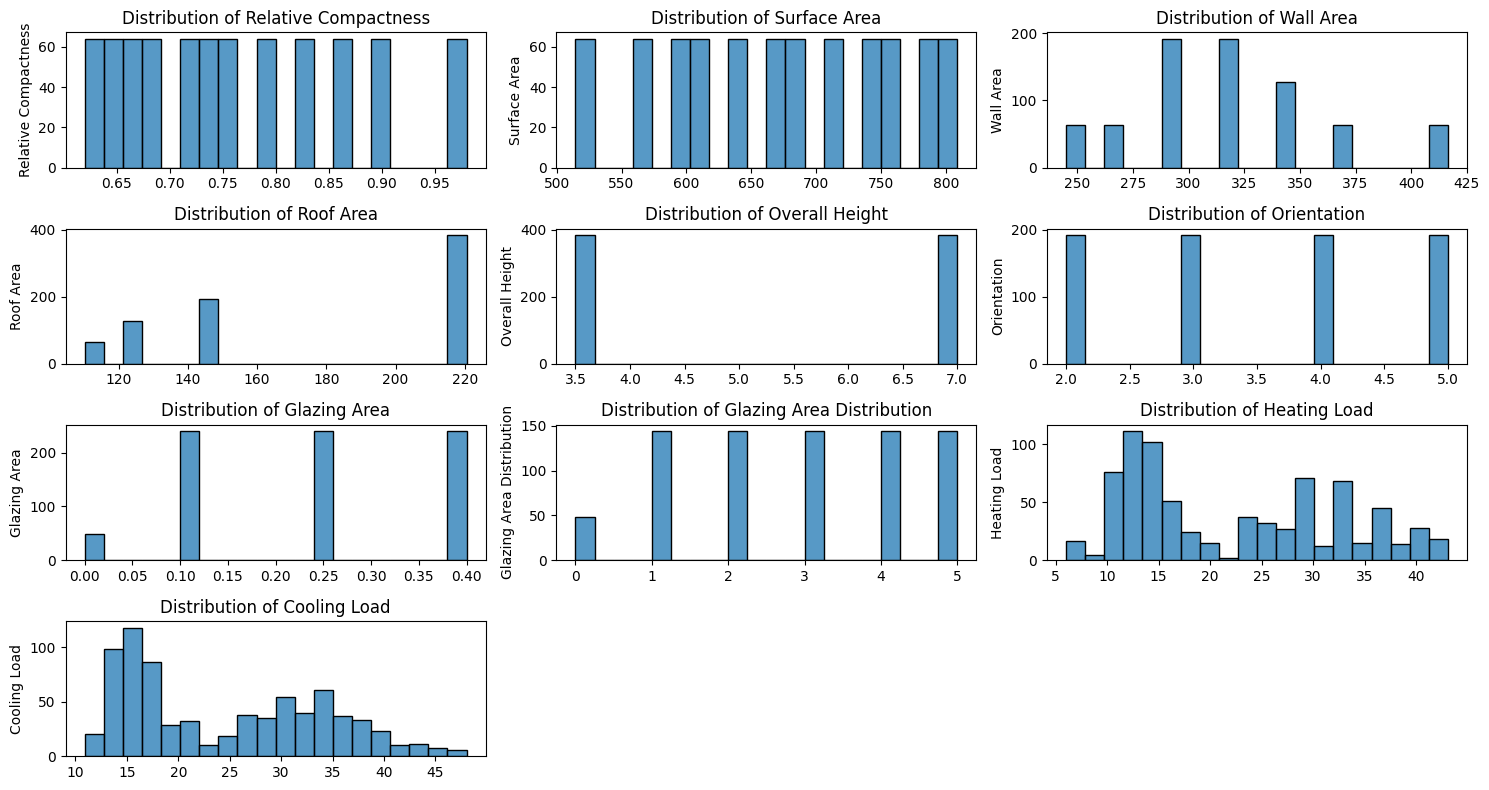

In [12]:
plot_distributions(data, bins=20)

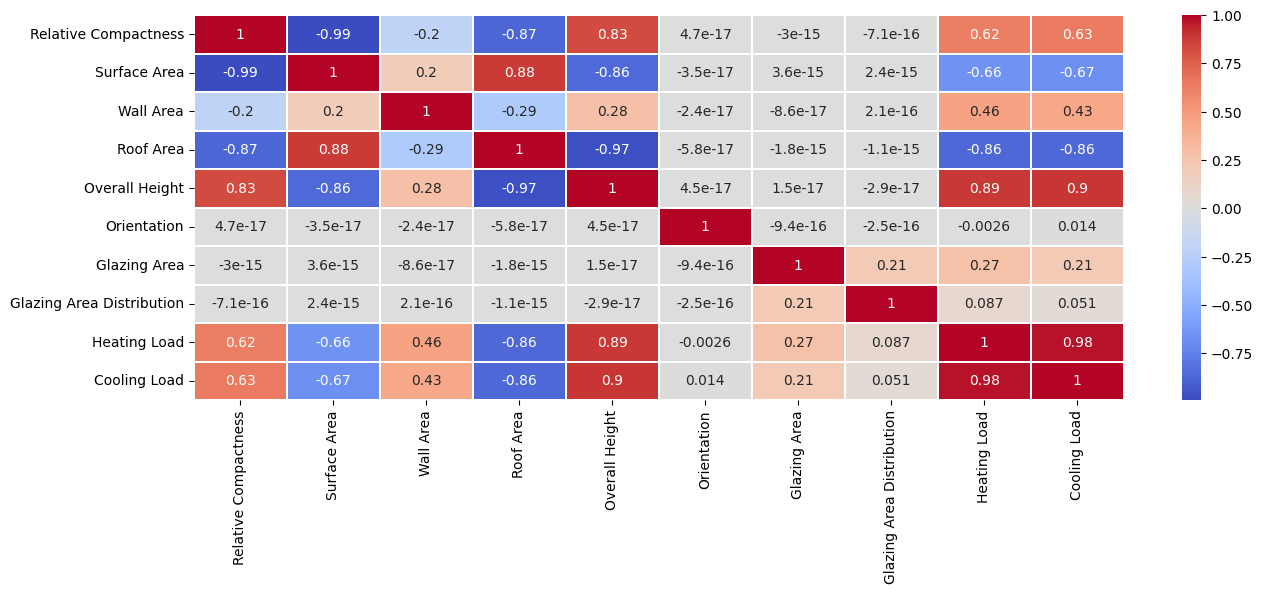

In [14]:
corr_matrix = data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidth=0.1);

**I noticed that `Orientation` and `Glazing Area Distribution` are numerical values that most probably represent categorical values.**
(e.g., North, East, South, West)



In [18]:
categorical_features = ['Orientation', 'Glazing Area Distribution']

X_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True, dtype=int)
X = X_encoded.iloc[:, :-2]

y_heating = data.iloc[:, -2]
y_cooling = data.iloc[:, -1]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train_cool, X_test_cool, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_cool_scaled = scaler.fit_transform(X_train_cool)
X_test_cool_scaled = scaler.transform(X_test_cool)

In [19]:
X_train.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load,Orientation_3,Orientation_4,Orientation_5,Glazing Area Distribution_1,Glazing Area Distribution_2,Glazing Area Distribution_3
60,0.82,612.5,318.5,147.0,7.0,0.10,23.53,27.31,0,0,0,1,0,0
618,0.64,784.0,343.0,220.5,3.5,0.40,18.90,22.09,0,1,0,0,1,0
346,0.86,588.0,294.0,147.0,7.0,0.25,29.27,29.90,0,1,0,0,1,0
294,0.90,563.5,318.5,122.5,7.0,0.25,32.84,32.71,0,1,0,1,0,0
231,0.66,759.5,318.5,220.5,3.5,0.10,11.43,14.83,0,0,1,0,0,0


# **Step 5: Model train**

In [20]:
result = pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R2-score'])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [24]:
models = [LinearRegression(),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          XGBRegressor(random_state=42), Ridge(random_state=42),
          Lasso(random_state=42),
          ElasticNet(random_state=42),
          SVR(),
          KNeighborsRegressor()]

In [40]:
model_name=[]
r2score=[]
rmse=[]
mse=[]
mae=[]

for model in models:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  model_name.append(model.__class__.__name__)
  r2score.append(str(r2_score( y_test_heating , y_pred ) * 100 ))
  rmse.append(str(root_mean_squared_error( y_test_heating , y_pred)))
  mse.append(str(mean_squared_error( y_test_heating , y_pred )))
  mae.append(str(mean_absolute_error( y_test_heating , y_pred )))
  result = pd.DataFrame({'Model':model_name,'R2-score':r2score,'RMSE':rmse,'MSE':mse,'MAE':mae})
result.sort_values(by='R2-score', ascending=False)

,Model,R2-score,RMSE,MSE,MAE
2,RandomForestRegressor,99.99486782397994,0.07313952908165047,0.005349390714285595,0.03585389610389442
4,Ridge,99.99060368804051,0.09896465196738553,0.009794002339025746,0.06821230587268484
1,DecisionTreeRegressor,99.98873947463751,0.10833797525852568,0.011737116883116922,0.04918181818181825
3,XGBRegressor,99.9736194093153,0.16582257160420538,0.027497125253431825,0.0864815021861684
5,Lasso,99.00368059358684,1.0190621774194697,1.0384877214469108,0.9229564537988787
7,SVR,98.20956683999543,1.366093561676377,1.8662116192536489,0.9947556483913236
6,ElasticNet,94.61764206945811,2.368577916635997,5.61016134717572,1.7974332347693704
8,KNeighborsRegressor,93.46005478094571,2.6108892101221888,6.816742467532467,1.8915714285714282
0,LinearRegression,100.0,1.1180048018244204e-14,1.2499347369024617e-28,1.0537025797351485e-14


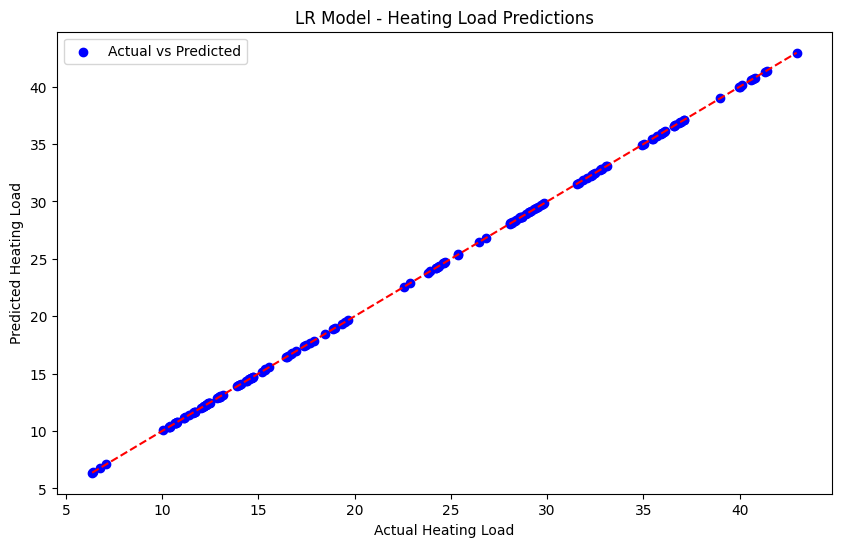

In [41]:
models[0].fit(X_train_scaled, y_train_heating)
y_pred_heating = models[0].predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test_heating, y_pred_heating, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test_heating), max(y_test_heating)], [min(y_test_heating), max(y_test_heating)], 'r--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('LR Model - Heating Load Predictions')
plt.legend()
plt.show()

In [42]:
model_name=[]
r2score=[]
rmse=[]
mse=[]
mae=[]

for model in models:
  model.fit(X_train_cool_scaled, y_train_cooling)
  y_pred = model.predict(X_test_cool_scaled)
  model_name.append(model.__class__.__name__)
  r2score.append(str(r2_score( y_test_heating , y_pred ) * 100 ))
  rmse.append(str(root_mean_squared_error( y_test_heating , y_pred)))
  mse.append(str(mean_squared_error( y_test_heating , y_pred )))
  mae.append(str(mean_absolute_error( y_test_heating , y_pred )))
  result = pd.DataFrame({'Model':model_name,'R2-score':r2score,'RMSE':rmse,'MSE':mse,'MAE':mae})
result.sort_values(by='R2-score', ascending=False)

,Model,R2-score,RMSE,MSE,MAE
7,SVR,91.44910227101055,2.985432417280858,8.912806718151428,2.5518712039339615
4,Ridge,89.66738007579333,3.281758475106833,10.769938688935525,2.745371791083323
3,XGBRegressor,89.62938728028203,3.287786412626356,10.809539495050483,2.7558622255201466
2,RandomForestRegressor,89.47052098601297,3.312873324035178,10.975129661103889,2.767008441558443
1,DecisionTreeRegressor,89.39906386220049,3.3240955375646384,11.049611142857144,2.7756753246753245
0,LinearRegression,89.35589385090825,3.3308569896821267,11.09460828571428,2.7739870129870092
5,Lasso,88.15930008419612,3.513096468654769,12.34184679807461,3.068908994228896
6,ElasticNet,87.36990976152657,3.6283119146554537,13.164647350030723,3.1739778038072592
8,KNeighborsRegressor,86.22781724512474,3.7888095618681987,14.355077896103891,3.1532597402597395


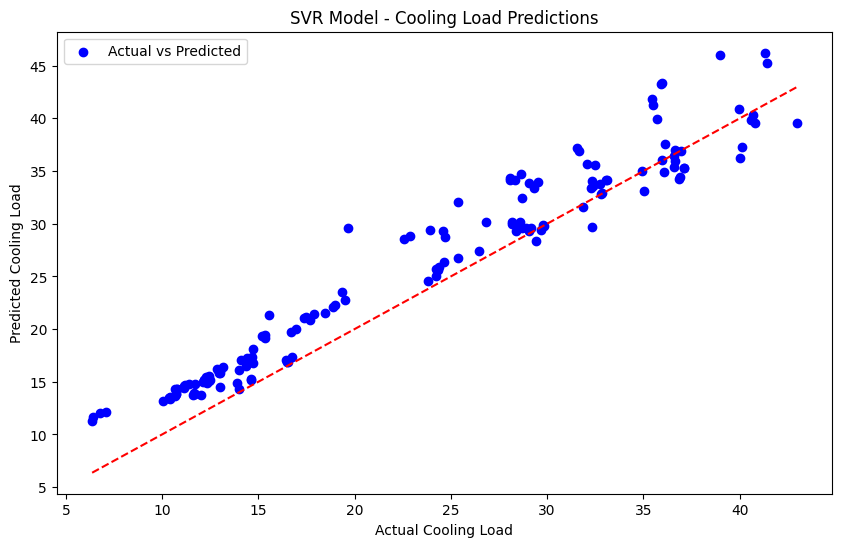

In [43]:
models[7].fit(X_train_cool_scaled, y_train_cooling)
y_pred_heating = models[0].predict(X_test_cool_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test_heating, y_pred_heating, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test_heating), max(y_test_heating)], [min(y_test_heating), max(y_test_heating)], 'r--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('SVR Model - Cooling Load Predictions')
plt.legend()
plt.show()

tune the SVR model

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],    # Epsilon parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'degree': [2, 3, 4],               # Only used for 'poly' kernel
    'gamma': ['scale', 'auto']          # Kernel coefficient for 'rbf' and 'poly'
}

In [47]:
grid_search = GridSearchCV(models[7], param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)
grid_search.fit(X_train_cool_scaled, y_train_cooling)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found:  {'C': 100, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [48]:
best_svr = grid_search.best_estimator_
y_pred_cooling_svr = best_svr.predict(X_test_scaled)

mse_cooling_svr = mean_squared_error(y_test_cooling, y_pred_cooling_svr)
r2_cooling_svr = r2_score(y_test_cooling, y_pred_cooling_svr)

print(f'SVR Model - Cooling Load: MSE = {mse_cooling_svr:.4f}, R² = {r2_cooling_svr:.4f}')

SVR Model - Cooling Load: MSE = 0.0000, R² = 1.0000


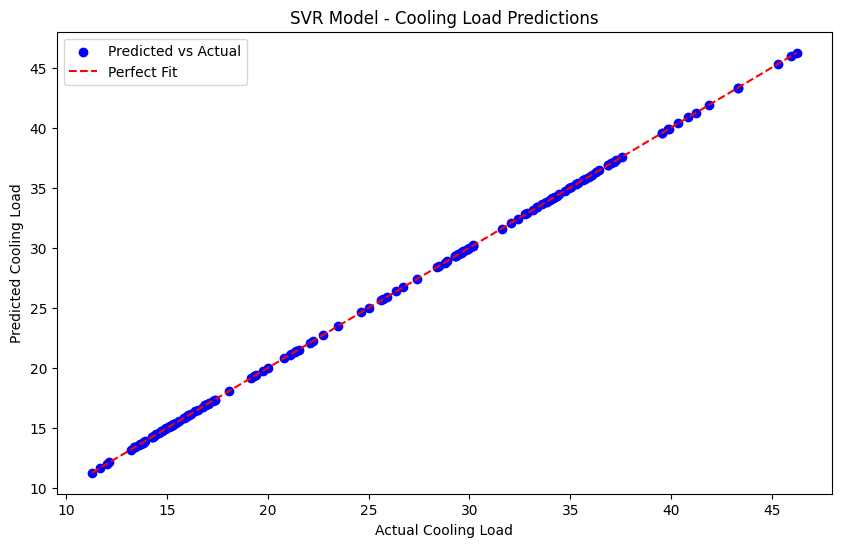

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_cooling, y_pred_cooling_svr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_cooling), max(y_test_cooling)], [min(y_test_cooling), max(y_test_cooling)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('SVR Model - Cooling Load Predictions')
plt.legend()
plt.show()

In [50]:
import joblib

# Save the trained model to a file
joblib.dump(best_svr, 'cooling_svr_model.pkl')

['cooling_svr_model.pkl']

In [51]:
!pip install flask

In [55]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('cooling_svr_model.pkl')

# route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        #data from the request (JSON format)
        data = request.json
        features = np.array(data['features']).reshape(1, -1)

        # categorical_features = ['Orientation', 'Glazing Area Distribution']
        # features = pd.get_dummies(data, columns=categorical_features, drop_first=True, dtype=int)

        scaler = StandardScaler()
        features_scaled = scaler.transform(features)

        # Make a prediction
        prediction = model.predict(features)

        # Return the prediction as JSON
        return jsonify({'prediction': float(prediction[0])})

    except Exception as e:
        # Handle any errors
        return jsonify({'error': str(e)})

# Start the Flask application
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
